# Vino Verde 🍷🍷


1. Import usual libraries

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, RocCurveDisplay, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
# setting Jedha color palette as default
pio.templates["jedha"] = go.layout.Template(
    layout_colorway=["#4B9AC7", "#4BE8E0", "#9DD4F3", "#97FBF6", "#2A7FAF", "#23B1AB", "#0E3449", "#015955"]
)
pio.templates.default = "jedha"
pio.renderers.default = "svg" # to be replaced by "iframe" if working on JULIE

2. Download the dataset ```winequality-red.csv``` from JULIE or from the url [wine_data](https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009) where you'll find a description of the variables. Display the first few lines of the dataset.

In [27]:
dataset = pd.read_csv("https://full-stack-bigdata-datasets.s3.eu-west-3.amazonaws.com/Machine+Learning+Supervis%C3%A9/R%C3%A9gression+logistique+Cross+validation/Datasets/winequality-red.csv")
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


2.bis Transform all variable names so that all spaces are replaced with "_".

In [28]:
dataset.columns = [col.replace(" ","_") for col in dataset.columns]
dataset.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


3. Use a command to get the variable type of each variable in the dataset as well as potential number of missing values.

In [29]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


4. Plot each of the explanatory variables against the target variable and analyse what you see. If you use untreated versions of the explanatory variables your graphs might be difficult to interpret, instead, try replacing the variables with a discretized version using ```pandas.qcut```.

Hint : The figures that you see below were produced by using the method `relplot()` from seaborn : https://seaborn.pydata.org/generated/seaborn.relplot.html

Variables were transformed before plotting with: 
```
pandas.qcut(..., q=50, labels=False, duplicates="drop")
```

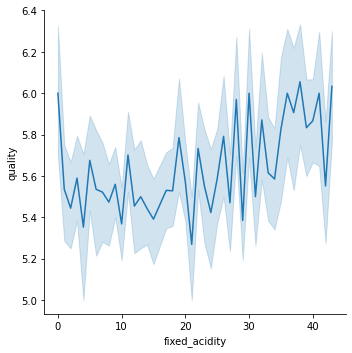

In [30]:
var_cut = pd.qcut(dataset["fixed_acidity"], 50, labels=False, duplicates="drop")
sns.relplot(x=var_cut, y=dataset["quality"], kind="line")

It seems that fixed acidity derives lower wine quality for levels under 20 then a faint linear growth in wine quality can be observed after index 20 of the discretized variable. 

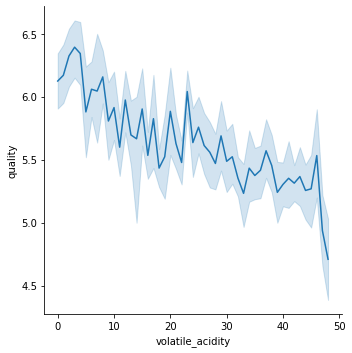

In [31]:
var_cut = pd.qcut(dataset["volatile_acidity"], 50, labels=False, duplicates="drop")
sns.relplot(x=var_cut, y=dataset["quality"], kind="line")

Here we observe a clear linear decrease of wine quality with volatile acidity

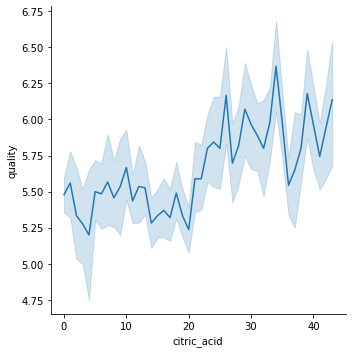

In [32]:
var_cut = pd.qcut(dataset["citric_acid"], 50, labels=False, duplicates="drop")
sns.relplot(x=var_cut, y=dataset["quality"], kind="line")

citric acid seems to have a staircase effect on the quality, quality is low and stable below 20, then increases to a higher level and stays high around the same level for values of citric acid higher than index 30.

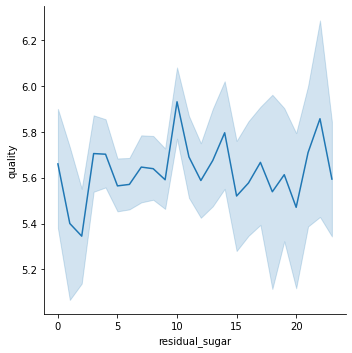

In [33]:
var_cut = pd.qcut(dataset["residual_sugar"], 50, labels=False, duplicates="drop")
sns.relplot(x=var_cut, y=dataset["quality"], kind="line")

No obvious changes in quality can be observed from this graph.

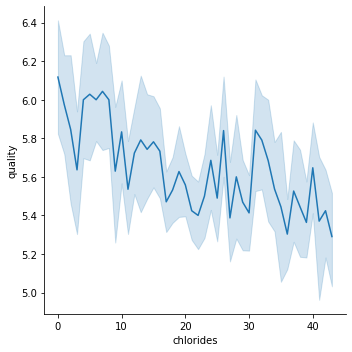

In [34]:
var_cut = pd.qcut(dataset["chlorides"], 50, labels=False, duplicates="drop")
sns.relplot(x=var_cut, y=dataset["quality"], kind="line")

This figure clearly indicates that wine quality decreases linearly depending on chlorides level

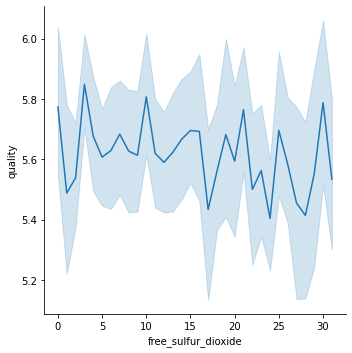

In [35]:
var_cut = pd.qcut(dataset["free_sulfur_dioxide"], 50, labels=False, duplicates="drop")
sns.relplot(x=var_cut, y=dataset["quality"], kind="line")

Free sulfur dioxide doesnt seem to influence wine quality based on this graph.

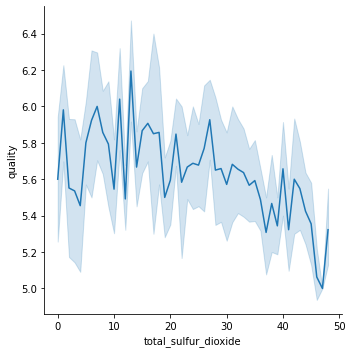

In [36]:
var_cut = pd.qcut(dataset["total_sulfur_dioxide"], 50, labels=False, duplicates="drop")
sns.relplot(x=var_cut, y=dataset["quality"], kind="line")

Total sulfur dioxide seems to have an increasingly strong negative effect on wine quality judging from this graph.

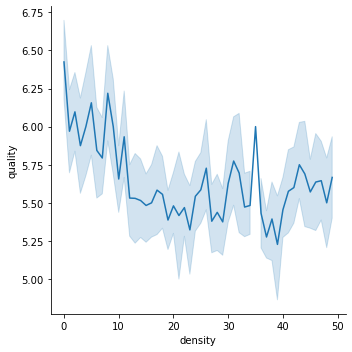

In [37]:
var_cut = pd.qcut(dataset["density"], 50, labels=False, duplicates="drop")
sns.relplot(x=var_cut, y=dataset["quality"], kind="line")

The negative effect on wine quality of the density variable gets smaller and smaller when reaching higher values of density, until the effect seems to get stable, meaning no more influence after index 40.

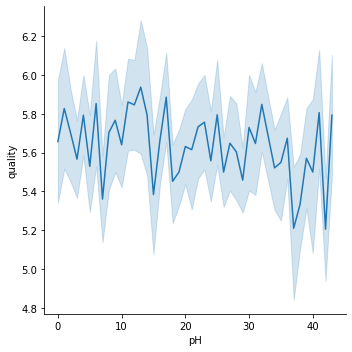

In [38]:
var_cut = pd.qcut(dataset["pH"], 50, labels=False, duplicates="drop")
sns.relplot(x=var_cut, y=dataset["quality"], kind="line")

pH seems to have a slighty linearly decreasing effect on wine quality judging from this graph.

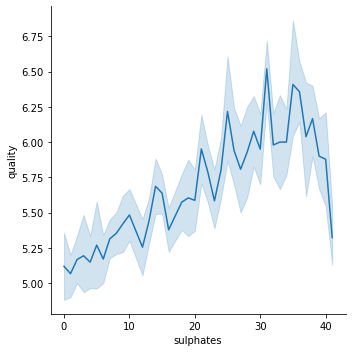

In [39]:
var_cut = pd.qcut(dataset["sulphates"], 50, labels=False, duplicates="drop")
sns.relplot(x=var_cut, y=dataset["quality"], kind="line")

The sulphates level in the wine seems to linearly increase wine quality until index 30, then we can observe a steep dropof quality level between index 30 and 40.

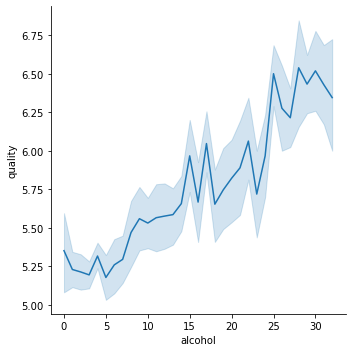

In [40]:
var_cut = pd.qcut(dataset["alcohol"], 50, labels=False, duplicates="drop")
sns.relplot(x=var_cut, y=dataset["quality"], kind="line")

Alcohol levels in the wine seem to have a linearly positive effect on wine quality.

5. Is the target variable uniformely distributed across all possible values? How could we transform the target variable in order for us to model it using a logistic regression?

Logistic regressions can be used to model ordinal **discrete** variables, let's use the original version of the target variable for what follows. As the target is already in numeric format, it won't be necessary to encode the labels 🙂

In [41]:
dataset['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

6. Separate X and y (explanatory variables and target variable) and split your dataset into a train set and a test set.

In [42]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y) # stratify = y !

7. Do the explanatory variables need encoding or normalization? If so proceed to the necessary transformations. Why is normalization important when using logistic regression?

In [43]:
dataset.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [44]:
## Normalization is necessary for logistic regression if we want to interpret the model parameters
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

8. Create and instance of a logisitic regression model and train this model on the training data.

In [45]:
classifier = LogisticRegression(multi_class = 'auto', solver = 'liblinear')
classifier.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

9. What's your model's score ? How would you evaluate your score ? Is there a baseline you could compare your score with ?

In [46]:
classifier.score(X_test, y_test)

0.59375

In [47]:
dataset['quality'].value_counts()/len(dataset)

5    0.425891
6    0.398999
7    0.124453
4    0.033146
8    0.011257
3    0.006254
Name: quality, dtype: float64

the baseline model would always predict the category "5" which is the most represented in the data. This would achieve an accuracy of 42.5%, therefore our logistic regression model is performing better than the baseline.

10. Use cross_val_score in order to get a cross validation score for this model and get a better feel of the model's average performance on this dataset.

In [48]:
scores = cross_val_score(classifier, X_train, y_train)
print("Cross-validated score : {}\nStd : {}".format(scores.mean(), scores.std()))

Cross-validated score : 0.5871783088235294
Std : 0.021168957543118892


11. Create an y_train_pred(y_test_pred) object containing model's predictions on X_train(X_test) and a y_train_pred_proba(y_test_pred_proba) containing the result of the predict_proba method applied on X_train(X_test).

In [49]:
y_train_pred = classifier.predict(X_train)
y_test_pred = classifier.predict(X_test)
y_test_pred[:5]

array([5, 5, 6, 5, 5], dtype=int64)

In [50]:
y_train_pred_proba=classifier.predict_proba(X_train) #n*m matrix with n = number of classes and m = number of examples
y_test_pred_proba=classifier.predict_proba(X_test) #n*m matrix with n = number of classes and m = number of examples
y_test_pred_proba[:5]

array([[0.0075072 , 0.02261497, 0.76841483, 0.19035473, 0.00979863,
        0.00130964],
       [0.0059105 , 0.05113737, 0.61007096, 0.30353159, 0.02323613,
        0.00611344],
       [0.00297293, 0.02285965, 0.21603272, 0.50136793, 0.23308165,
        0.02368511],
       [0.00908274, 0.04191965, 0.4678357 , 0.4460899 , 0.03001906,
        0.00505295],
       [0.0044664 , 0.02611294, 0.75335243, 0.2040525 , 0.0092619 ,
        0.00275383]])

12. Display the confusion matrices on train/test set

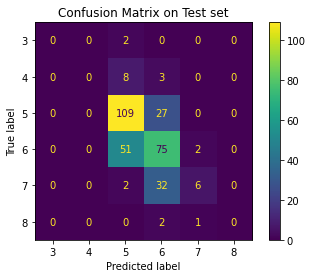

In [51]:
# Visualize confusion matrices

"""
#PLOTLY METHOD
from plotly.subplots import make_subplots
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

fig = make_subplots(rows = 1, cols = 2, subplot_titles = ("train", "test"), 
                    x_title = 'Prediction', y_title = 'True label')
fig.update_layout(
        title = go.layout.Title(text = "Confusion matrices", x = 0.5))
fig.update_yaxes(autorange='reversed')
fig.add_trace(
    go.Heatmap(
        name = 'train',
        x = ['3', '4', '5', '6', '7', '8'], # put here the class labels
        y = ['3', '4', '5', '6', '7', '8'], 
        z = cm_train,
        colorscale = 'gnbu',
        zmin = 0,
        zmax = max(cm_train.max(), cm_test.max())
    ),
    row = 1,
    col = 1
)  
fig.add_trace(
    go.Heatmap(
        name = 'test',
        x = ['3', '4', '5', '6', '7', '8'], 
        y = ['3', '4', '5', '6', '7', '8'], 
        z = cm_test,
        colorscale = 'gnbu',
        zmin = 0,
        zmax = max(cm_train.max(), cm_test.max())
    ),
    row = 1,
    col = 2
)
"""

from IPython.display import clear_output
clear_output(wait=True) # Simply clear above string output

# SKLEARN 1.0 METHOD
_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Test set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax) # ConfusionMatrixDisplay from sklearn
plt.show()

12bis. Try to use `ConfusionMatrixDisplay` with [`confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html?highlight=confusion_matrix#sklearn.metrics.confusion_matrix) to get a normalized version of your confusion matrix. 

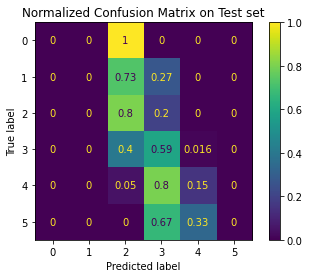

In [52]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred, normalize="true")

_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Normalized Confusion Matrix on Test set") # Set a title that we will add into ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(cm).plot(ax=ax)

13. What's the most frequent label in the dataset? Plot the distribution of the quality variable across all possible categories.

In [53]:
label_counts = dataset['quality'].value_counts()
label_counts = label_counts.reset_index().rename({'index': 'quality', 'quality': 'count'}, axis = 1)
label_counts

,quality,count
0,5,681
1,6,638
2,7,199
3,4,53
4,8,18
5,3,10


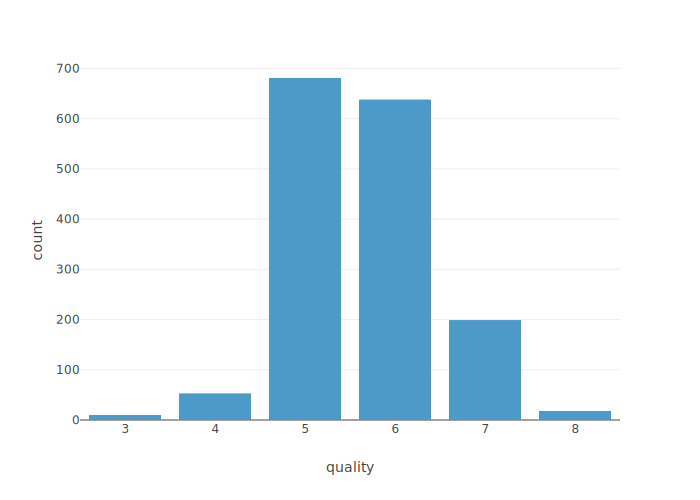

In [54]:
px.bar(label_counts, x = 'quality', y = 'count')

14. What would be your score if you had always predicted only the value "5" ? Plot also the confusion matrix that you would obtain with this dummy model

In [55]:
y_pred_5 = [5]*len(y_test)
accuracy_score(y_pred_5, y_test)

0.425

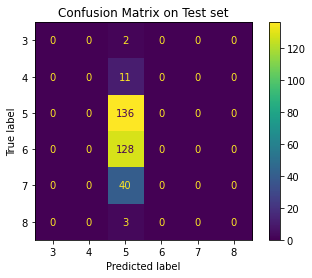

In [56]:
# SKLEARN 1.0 METHOD
_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Test set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_5, ax=ax) # ConfusionMatrixDisplay from sklearn
plt.show()

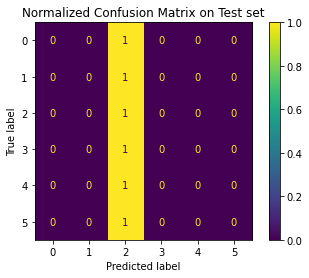

In [57]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_5, normalize="true")

_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Normalized Confusion Matrix on Test set") # Set a title that we will add into ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(cm).plot(ax=ax)

15. What does it mean regarding your model ?

----> Our model, although its not the best it can probably be in terms of prediction performance achieves better predictive power than a baseline model.

16. Use Chi2 test in order to analyse the importance of each variable in your dataset. You may find more information on this test following this link : [scikitlearn](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html)

In [58]:
from sklearn.feature_selection import chi2
feature_importance = chi2(X, y)
feature_importance 

(array([1.12606524e+01, 1.55802891e+01, 1.30256651e+01, 4.12329474e+00,
        7.52425579e-01, 1.61936036e+02, 2.75555798e+03, 2.30432045e-04,
        1.54654736e-01, 4.55848775e+00, 4.64298922e+01]),
 array([4.64500416e-02, 8.15035154e-03, 2.31394417e-02, 5.31804675e-01,
        9.79968040e-01, 3.82728810e-33, 0.00000000e+00, 1.00000000e+00,
        9.99526491e-01, 4.72096321e-01, 7.42403757e-09]))

17. Put these values into a DataFrame for more readability.

In [59]:
feature_ranking = pd.DataFrame(columns=X.columns, data=feature_importance, 
                               index=["Chi2 Score", "P-value"]).transpose().sort_values("Chi2 Score")
feature_ranking = feature_ranking.reset_index().rename({'index': 'feature'}, axis = 1)
feature_ranking

,feature,Chi2 Score,P-value
0,density,0.000230,1.000000e+00
1,pH,0.154655,9.995265e-01
2,chlorides,0.752426,9.799680e-01
3,residual_sugar,4.123295,5.318047e-01
4,sulphates,4.558488,4.720963e-01
5,fixed_acidity,11.260652,4.645004e-02
6,citric_acid,13.025665,2.313944e-02
7,volatile_acidity,15.580289,8.150352e-03
8,alcohol,46.429892,7.424038e-09
9,free_sulfur_dioxide,161.936036,3.827288e-33


18. Create a barchart visualization, what can you conclude ?

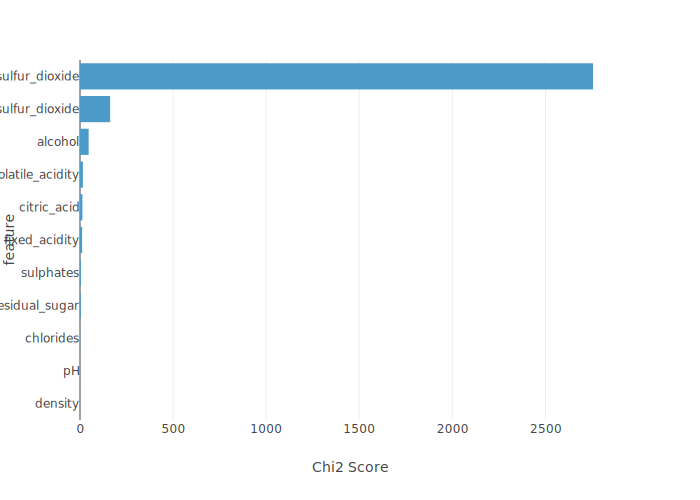

In [60]:
px.bar(feature_ranking, y = 'feature', x = 'Chi2 Score')

19. Try fitting the same model using the argument class_weight="balanced", what are the consequences on all the aspects studied before ?

In [61]:
classifier = LogisticRegression(class_weight="balanced") # takes into account the different classes' proportions
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
classifier.score(X_test, y_test)

0.4375

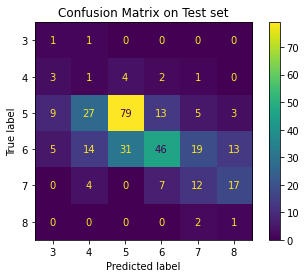

In [62]:
_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Test set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=ax) # ConfusionMatrixDisplay from sklearn
plt.show()

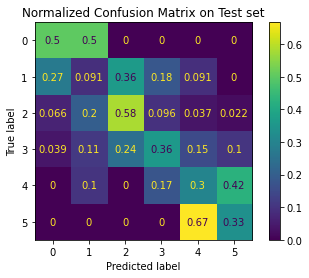

In [63]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred, normalize="true")

_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Normalized Confusion Matrix on Test set") # Set a title that we will add into ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(cm).plot(ax=ax)

**The model's performances have been deteriorated, but now all the classes are treated with equal importances, which means that the model tries to make good predictions even for rare classes**

21. As an extra question for which no fixed solution will be proposed, attempt to improve the score using feature engineering (create new variables using common functions, combining variables together in a non-linear way etc...)